<a href="https://colab.research.google.com/github/JAYANTHNITW/Detection-of-psychological-stress-through-social-media-using-deep-learning/blob/main/Detection_of_psychological_stress_through_social_media_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Embedding,Dropout,LSTM,GRU,Flatten,Conv1D,Input,GlobalMaxPool1D,Concatenate

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv("Dataset-Multitask1.csv")
df_train.tail()

,Unnamed: 0,Text,Sarcasm,Stress
7284,1150,"@AngelLamuno @lunarossa Relax mate, we have a ...",0,0
7285,1151,"This doesn't mean that you relax on COVID 19, ...",0,0
7286,1152,Melbourne to relax third lockdown as no new CO...,0,0
7287,1153,JUST IN: Mayors vote 9-8 to put Metro Manila u...,0,0
7288,1154,"You can return to your social apps and news, b...",1,0


In [ ]:
df1 = pd.read_csv("Dataset-Multitask1.csv")
df1.shape

(7289, 4)

In [ ]:
df2 = pd.read_csv("Dataset-Multitask2.csv")
df2.shape

(16532, 4)

In [ ]:
df3 = pd.read_csv("Dataset-Multitask3.csv")
df3.shape

(4062, 4)

In [ ]:
df4 = pd.read_csv("Dataset-Multitask4.csv")
df4.shape

(7209, 4)

In [ ]:
#how to join 4 csv data sets?
import pandas as pd

# Assuming your CSV files are named 'Dataset-Multitask1.csv', 'Dataset-Multitask2.csv', etc.
df1 = pd.read_csv("Dataset-Multitask1.csv")
df2 = pd.read_csv("Dataset-Multitask2.csv")
df3 = pd.read_csv("Dataset-Multitask3.csv")
df4 = pd.read_csv("Dataset-Multitask4.csv")

# Concatenate the DataFrames vertically (along rows)
combined_df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

# Now, 'combined_df' contains the data from all 4 CSV files.
# You can further process or save this combined DataFrame as needed.

In [ ]:
combined_df.shape

(35092, 4)

In [ ]:
df_train = combined_df

In [ ]:
# df_test = pd.read_csv("Dataset-Multitask1.csv")
# df_test.tail()

In [ ]:
df_train = df_train.drop(['Unnamed: 0'],axis=1)
# df_test = df_test.drop(['Unnamed: 0'],axis=1)

In [ ]:
#df_train = pd.concat([df_train,df_test],axis=0)

In [ ]:
df_train.shape

(35092, 3)

In [ ]:
df_train.head()

,Text,Sarcasm,Stress
0,Peer-reviewed article that systematically deco...,0,1
1,Dealing with stress for children and youth liv...,0,1
2,"Pandemic living is stressful for everyone, eve...",0,1
3,"Stress leave, tears and insomnia: Greater Vict...",0,1
4,"Stress leave, tears and insomnia: Greater Vict...",0,1


# TEXT Preprocessing

## 1. Lower Casing

In [ ]:
df_train['Text'] = df_train['Text'].str.lower()

## 2. HTML Tags

In [ ]:
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [ ]:
df_train['Text'] = df_train['Text'].apply(remove_html_tags)

## Removing URL's in Text

In [ ]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\/S+')
  return pattern.sub(r'',text)

In [ ]:
df_train['Text'] = df_train['Text'].apply(remove_url)

## Removing Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [ ]:
df_train['Text'] = df_train['Text'].apply(remove_punc)

## 5. Spelling Corrections

In [ ]:
from textblob import TextBlob

In [ ]:
def correct_spelling(text):
  blob = TextBlob(text)
  corrected_text = blob.correct()
  return str(corrected_text)

## 6. Stemming

In [ ]:
from nltk import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
df_train['Text'] = df_train['Text'].apply(lambda x:stemmer.stem(x))

## 7. Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

df_train['Text'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

,Text
0,peerreviewed article systematically deconstruc...
1,dealing stress children youth living diabetes ...
2,pandemic living stressful everyone even who’ve...
3,stress leave tears insomnia greater victoria t...
4,stress leave tears insomnia greater victoria t...
...,...
35087,malaysia relax covid19 testing rules certain t...
35088,🇦🇪 united arab emirates authorities relax covi...
35089,fresh active cases covid19 decreasing relax wa...
35090,covidupdates delhi relax since covid19 restric...


## 8. Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk import word_tokenize

In [ ]:
df_train['Text'].apply(lambda x:word_tokenize(x))

,Text
0,"[peerreviewed, article, that, systematically, ..."
1,"[dealing, with, stress, for, children, and, yo..."
2,"[pandemic, living, is, stressful, for, everyon..."
3,"[stress, leave, tears, and, insomnia, greater,..."
4,"[stress, leave, tears, and, insomnia, greater,..."
...,...
35087,"[malaysia, to, relax, covid19, testing, rules,..."
35088,"[🇦🇪, united, arab, emirates, authorities, rela..."
35089,"[fresh, and, active, cases, of, covid19, are, ..."
35090,"[covidupdates, delhi, can, relax, since, all, ..."


In [ ]:
df_train['Text'] = df_train['Text'].apply(lambda x:word_tokenize(x))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Text'])

In [ ]:
x = tokenizer.texts_to_sequences(df_train['Text'])

In [ ]:
# x
max([len(i) for i in x])

33

In [ ]:
df_train['Text'].shape

(35092,)

In [ ]:
# Vocabulary based on tokenization
vocabulary = tokenizer.word_index
print(len(vocabulary))

16949


In [ ]:
import gensim

In [ ]:
!wget nlp.stanford.edu/data/glove.6B.zip

--2024-12-31 11:46:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-31 11:46:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-31 11:46:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_input_file = "glove.6B.100d.txt"

In [ ]:
glove_output_file = "word2vec.txt"

In [ ]:
glove2word2vec(glove_input_file,glove_output_file)

<ipython-input-48-13f14740c424>:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file,glove_output_file)


(400000, 100)

In [ ]:
maxlen = 22
from keras.utils import pad_sequences
lines_paded = pad_sequences(x,maxlen=maxlen,padding='post')

In [ ]:
# lines_paded[:30]

In [ ]:
y1 = np.array(df_train['Sarcasm'])
y2 = np.array(df_train['Stress'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_task1, y_val_task1, y_train_task2, y_val_task2 = train_test_split(
    lines_paded, y1, y2, test_size=0.2, random_state=42)

In [ ]:
print(f"x_train shape {X_train.shape}")
print(f"x_val shape {X_val.shape}")
print(f"y_train_task1 shape {y_train_task1.shape}")
print(f"y_train_task2 shape {y_train_task2.shape}")
print(f"y_val_task1 shape {y_val_task1.shape}")
print(f"y_val_task2 shape {y_val_task2.shape}")

x_train shape (28073, 25)
x_val shape (7019, 25)
y_train_task1 shape (28073,)
y_train_task2 shape (28073,)
y_val_task1 shape (7019,)
y_val_task2 shape (7019,)


In [ ]:
X_train

array([[  80,   48,  396, ..., 2441,   11, 1918],
       [1418,    3,  550, ...,    0,    0,    0],
       [ 445,  383,  771, ...,    0,    0,    0],
       ...,
       [   4,    6,   35, ...,    0,    0,    0],
       [   2,   71,   12, ...,    0,    0,    0],
       [   1,  152,    5, ...,    0,    0,    0]], dtype=int32)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from gensim.models import KeyedVectors

glove_model = KeyedVectors.load_word2vec_format(glove_output_file, binary=False)

vocab_size = len(vocabulary) + 1  # Add 1 for unknown words

embedding_dim = 100  # Adjust the embedding dimension based on your GloVe model
max_length = 25
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in vocabulary.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

In [ ]:
# vocabulary

In [ ]:
embedding_matrix.shape

(16950, 100)

## Multitask CNN architecutre

In [ ]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,accuracy_score,recall_score

In [ ]:
from keras.optimizers import Adam
sequence_len= 25
embedding_dim= 100
input_shape = (sequence_len,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            trainable=False)(input_layer)


In [ ]:
# channel 1

conv_1d_1 = Conv1D(64,5,activation='relu')(embedding_layer)

gmp1d_1 = GlobalMaxPool1D()(conv_1d_1)
dense_control_1 = Dense(64,activation='relu')(gmp1d_1)

dense1 = Dense(64,activation='relu')(gmp1d_1)
output_stress = Dense(1,activation='sigmoid',name='output_stress')(dense1)

model1 = Model(inputs=input_layer,outputs=[output_stress])
high_learning_rate = 0.001

model1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=high_learning_rate),metrics=['accuracy'])
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 25, 100)             │       1,695,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 21, 64)              │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_stress (Dense)                │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,731,289 (6.60 MB)

 Trainable params: 36,289 (141.75 KB)

 Non-trainable params: 1,695,000 (6.47 MB)

In [ ]:
history = model1.fit(X_train,[y_train_task2],validation_data=(X_val,[y_val_task2]),epochs=15,batch_size=32)

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9224 - loss: 0.1894 - val_accuracy: 0.9803 - val_loss: 0.0608
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9888 - loss: 0.0392 - val_accuracy: 0.9843 - val_loss: 0.0517
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9941 - loss: 0.0256 - val_accuracy: 0.9869 - val_loss: 0.0479
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0165 - val_accuracy: 0.9839 - val_loss: 0.0488
Epoch 5/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9953 - loss: 0.0158 - val_accuracy: 0.9835 - val_loss: 0.0537
Epoch 6/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9942 - loss: 0.0148 - val_accuracy: 0.9855 - val_loss: 0.0524
Epoch 7/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9960 - loss: 0.0102 - val_accuracy: 0.9856 - val_loss: 0.0554
Epoch 8/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9963 - loss: 0.0081 - val_accuracy: 0.

In [ ]:
X_val.shape

(7019, 25)

In [ ]:
list(y_val_task2).count(1)

5503

In [ ]:
y_pred_task2 = model1.predict(X_val)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
threshold=0.5
# y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)

In [ ]:
confusion_matrix(y_val_task2,y_pred_binary2)

array([[1450,   66],
       [  27, 5476]])

In [ ]:
list(y_pred_binary2).count(1)

5542

In [ ]:
accuracy_score(y_val_task2,y_pred_binary2)

0.9867502493232654

In [ ]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress)

0.9915799004074242


In [ ]:
recall_score(y_val_task2,y_pred_binary2)

0.9950935853170998

In [ ]:
precision_score(y_val_task2,y_pred_binary2,average=None)

array([0.9817197 , 0.98809094])

In [ ]:
from keras import backend as K

def f1_score_metric(y_true, y_pred):
    y_pred = K.round(y_pred)  # Convert probabilities to 0 or 1
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)  # False positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)  # False negatives

    precision = tp / (tp + fp + K.epsilon())  # Precision
    recall = tp / (tp + fn + K.epsilon())  # Recall

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # F1 Score
    return K.mean(f1)  # Average F1 score across batches


In [ ]:
# channel 1
dropout_1 = Dropout(0.5)(embedding_layer)
conv_1d_1 = Conv1D(64,5,activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(conv_1d_1)
gmp1d_1 = GlobalMaxPool1D()(dropout_2)
dense_control_1 = Dense(64,activation='relu')(gmp1d_1)

# Channel 2
dropout_3 = Dropout(0.5)(embedding_layer)
conv_1d_2 = Conv1D(64,5,activation='relu')(dropout_3)
dropout_4 = Dropout(0.3)(conv_1d_2)
gmp1d_2 = GlobalMaxPool1D()(dropout_4)

merged = Concatenate(axis=-1)([gmp1d_1,gmp1d_2])

dense1 = Dense(64,activation='relu')(merged)
output_sarcasm = Dense(1,activation='sigmoid',name='output_sarcasm')(dense1)
output_stress = Dense(1,activation='sigmoid',name='output_stress')(dense1)

model = Model(inputs=input_layer,outputs=[output_sarcasm,output_stress])
# high_learning_rate = 0.1

# model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=high_learning_rate),metrics=['accuracy','accuracy'])
model.compile(
    loss={'output_sarcasm': 'binary_crossentropy', 'output_stress': 'binary_crossentropy'},
    loss_weights={'output_sarcasm': 1.0, 'output_stress': 1.0},  # Adjust these weights
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy','accuracy']
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 25)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 25, 100)        │      1,695,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 25, 100)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 25, 100)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 21, 64)         │         32,064 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 21, 64)         │         32,064 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 21, 64)         │              0 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 21, 64)         │              0 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 64)             │              0 │ dropout_1[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 64)             │              0 │ dropout_3[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128)            │              0 │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_sarcasm (Dense)    │ (None, 1)              │             65 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_stress (Dense)     │ (None, 1)              │             65 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,767,514 (6.74 MB)

 Trainable params: 72,514 (283.26 KB)

 Non-trainable params: 1,695,000 (6.47 MB)

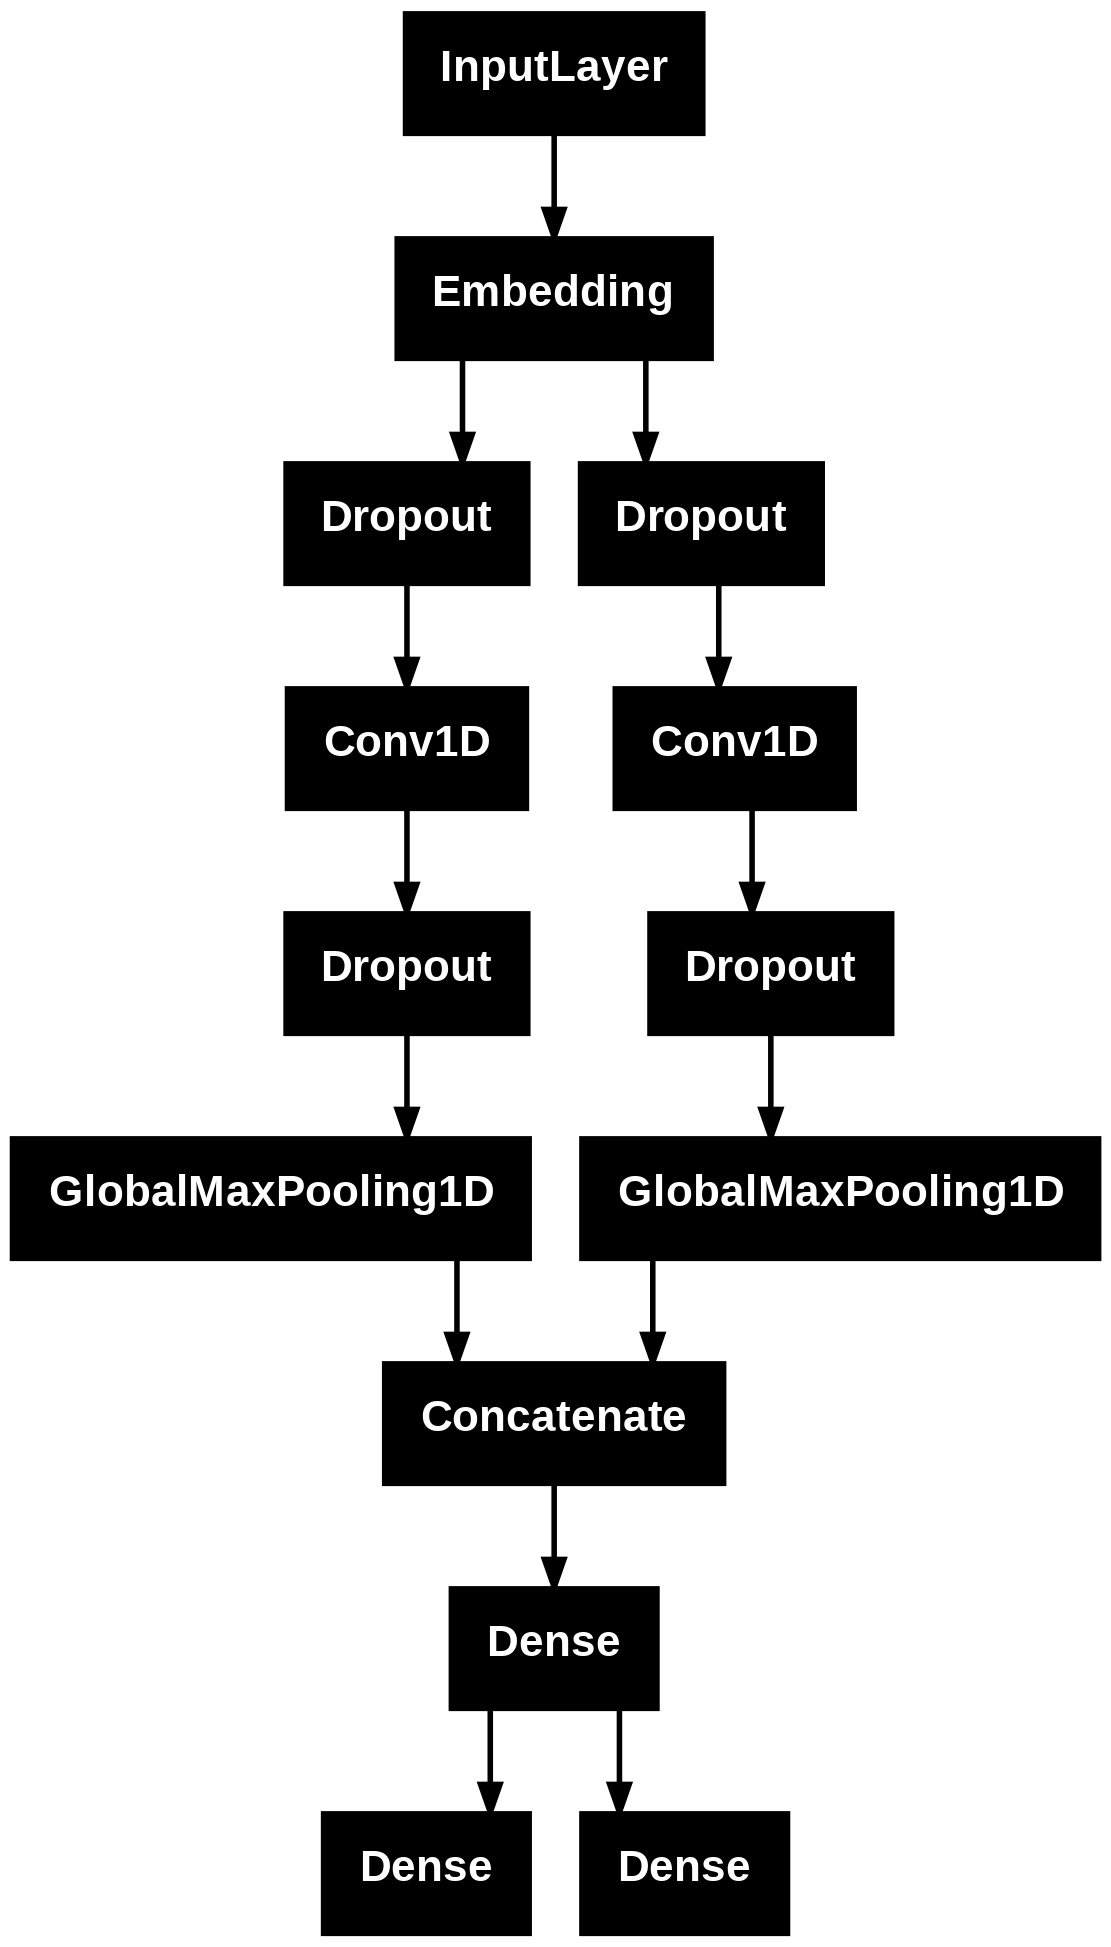

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Create a function to build a TensorBoard callback
# def create_tensorborad_callback():
#   # Create a log directory for storing TensorBoard logs
#   logdir = os.path.join('/content/drive/MyDrive/logs',
#                         # Make it so the logs get tracked whenever we run an experiment
#                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
import os,datetime
import tensorflow as tf

In [ ]:
# tensorboard = create_tensorborad_callback(),callbacks=[tensorboard]

In [ ]:
history = model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=50,batch_size=32)

Epoch 1/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.6606 - output_sarcasm_accuracy: 0.9026 - output_sarcasm_loss: 0.3372 - output_stress_accuracy: 0.8639 - output_stress_loss: 0.3234 - val_loss: 0.4278 - val_output_sarcasm_accuracy: 0.9174 - val_output_sarcasm_loss: 0.2497 - val_output_stress_accuracy: 0.9409 - val_output_stress_loss: 0.1781
Epoch 2/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.4271 - output_sarcasm_accuracy: 0.9178 - output_sarcasm_loss: 0.2517 - output_stress_accuracy: 0.9291 - output_stress_loss: 0.1754 - val_loss: 0.3576 - val_output_sarcasm_accuracy: 0.9202 - val_output_sarcasm_loss: 0.2296 - val_output_stress_accuracy: 0.9547 - val_output_stress_loss: 0.1279
Epoch 3/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3860 - output_sarcasm_accuracy: 0.9161 - output_sarcasm_loss: 0.2330 - output_stress_accuracy: 0.9391 - output_stress_loss: 0.1529 - val_loss: 0.3460 - val_output_sarcasm_accuracy: 0.9225 - val_output_sarcasm_loss: 0.2191 - val

In [ ]:
#model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=15,batch_size=32)

In [ ]:
X_val

array([[   65,    45,   199, ...,     0,     0,     0],
       [   17,   285,   307, ...,     0,     0,     0],
       [    8, 10282,     1, ...,     0,     0,     0],
       ...,
       [   34,     1,    57, ...,     0,     0,     0],
       [  253,     5,     1, ...,  1475,   100,   322],
       [   31,  5874,   231, ...,     0,     0,     0]], dtype=int32)

In [ ]:
list(y_train_task1).count(0)


25617

In [ ]:
list(y_train_task1).count(1)

2456

In [ ]:
list(y_train_task2).count(0)

6143

In [ ]:
list(y_train_task2).count(1)

21930

In [ ]:
y_pred_task1,y_pred_task2 = model.predict(X_val)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
threshold=0.5
y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)
# print(y_pred_binary1)

In [ ]:
# (y_val_task1[:100],y_pred_binary1[:100])

In [ ]:
confusion_matrix(y_val_task1,y_pred_binary1)

array([[6211,  210],
       [ 228,  370]])

In [ ]:
confusion_matrix(y_val_task2,y_pred_binary2)

array([[1423,   93],
       [  16, 5487]])

In [ ]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm)

0.6281833616298812


In [ ]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

0.6379310344827587


In [ ]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress)

0.9901651177479022


In [ ]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)

0.9833333333333333


## GRU CNN GRU WITH ATTENTION LAYERS

In [ ]:
from keras.src.layers import Concatenate
from keras.layers import Bidirectional,GlobalMaxPool1D,Attention,RepeatVector
from keras.optimizers import Adam
sequence_len=25
embedding_dim=100
input_shape=(sequence_len,)
input_layer = Input(shape=input_shape)

embedding_layer = Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],trainable=False)(input_layer)

# Conv layer + Maxpool layer *3
conv_layer=Conv1D(64,5,activation='relu',)(embedding_layer)
conv_layer = GlobalMaxPool1D()(conv_layer)

# Lstm for task1
lstm_layer1 = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer1 = Attention()([lstm_layer1, lstm_layer1])
attended_lstm1 = Concatenate(axis=-1)([lstm_layer1, attention_layer1])
lstm_layer1 = GlobalMaxPool1D()(attended_lstm1)

# Lstm for task2
lstm_layer2 = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer2 = Attention()([lstm_layer2, lstm_layer2])
attended_lstm2 = Concatenate(axis=-1)([lstm_layer2, attention_layer2])
lstm_layer2 = GlobalMaxPool1D()(attended_lstm2)

#Reshaping
conv_layer_reshaped = RepeatVector(sequence_len)(conv_layer)
lstm_layer_reshaped1 = RepeatVector(sequence_len)(lstm_layer1)
lstm_layer_reshaped2 = RepeatVector(sequence_len)(lstm_layer2)

# concatenation
concatenated1 = Concatenate(axis=-1)([conv_layer_reshaped,lstm_layer_reshaped1])
concatenated2 = Concatenate(axis=-1)([conv_layer_reshaped,lstm_layer_reshaped2])

# Flatten the concatenated output to match the shape for binary classification
flattened_output1 = Flatten()(concatenated1)
flattened_output2 = Flatten()(concatenated2)

output1 = Dense(1,activation='sigmoid',name='sarcasm')(flattened_output1)
output2 = Dense(1,activation='sigmoid',name='stress')(flattened_output2)

model = Model(inputs=input_layer, outputs=[output1,output2])
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy','accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 25)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 25, 100)        │      1,695,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 25, 128)        │         63,744 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 25, 128)        │         63,744 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 25, 128)        │              0 │ bidirectional[0][0],   │
│                           │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, 25, 128)        │              0 │ bidirectional_1[0][0], │
│                           │                        │                │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 21, 64)         │         32,064 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 25, 256)        │              0 │ bidirectional[0][0],   │
│ (Concatenate)             │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 25, 256)        │              0 │ bidirectional_1[0][0], │
│ (Concatenate)             │                        │                │ attention_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_3    │ (None, 64)             │              0 │ conv1d_3[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_4    │ (None, 256)            │              0 │ concatenate_1[0][0]    │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_5    │ (None, 256)            │              0 │ concatenate_2[0][0]    │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector             │ (None, 25, 64)         │              0 │ global_max_pooling1d_… │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_1           │ (None, 25, 256)        │              0 │ global_max_pooling1d_… │
│ (RepeatVector)       

 Total params: 1,870,554 (7.14 MB)

 Trainable params: 175,554 (685.76 KB)

 Non-trainable params: 1,695,000 (6.47 MB)

In [ ]:

model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=15,batch_size=32)

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - loss: 0.4801 - sarcasm_accuracy: 0.9156 - sarcasm_loss: 0.2636 - stress_accuracy: 0.9113 - stress_loss: 0.2166 - val_loss: 0.2953 - val_sarcasm_accuracy: 0.9201 - val_sarcasm_loss: 0.1989 - val_stress_accuracy: 0.9628 - val_stress_loss: 0.0961
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - loss: 0.1992 - sarcasm_accuracy: 0.9403 - sarcasm_loss: 0.1479 - stress_accuracy: 0.9838 - stress_loss: 0.0512 - val_loss: 0.2140 - val_sarcasm_accuracy: 0.9416 - val_sarcasm_loss: 0.1385 - val_stress_accuracy: 0.9799 - val_stress_loss: 0.0751
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 0.1457 - sarcasm_accuracy: 0.9511 - sarcasm_loss: 0.1162 - stress_accuracy: 0.9918 - stress_loss: 0.0295 - val_loss: 0.2166 - val_sarcasm_accuracy: 0.9377 - val_sarcasm_loss: 0.1499 - val_stress_accuracy: 0.9801 - val_stress_loss: 0.0666
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 0.1356 - sarcasm_accuracy: 0.9543 - sa

In [ ]:
y_pred_task1,y_pred_task2 = model.predict(X_val)

220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
threshold=0.5
y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)
print(y_pred_binary1)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm)

0.6021717670286278


In [ ]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

0.7349397590361446


In [ ]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress )

0.9916711931921057


In [ ]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)

0.9880930903842684


## Pipelined Stress Architecture

In [ ]:
from keras.src.layers import Concatenate
from keras.optimizers import Adam
sequence_len=25
embedding_dim=100
input_shape=(sequence_len,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],trainable=False)(input_layer)

BiGRU_layer = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer = Attention()([BiGRU_layer,BiGRU_layer])
concatenated_layer = Concatenate(axis=-1)([attention_layer,BiGRU_layer])
gmp_layer = GlobalMaxPool1D()(concatenated_layer)

dense_layer1 = Dense(64,activation='relu')(gmp_layer)
dense_layer2 = Dense(64,activation='relu')(gmp_layer)

output_sarcasm = Dense(1,activation='sigmoid',name='sarcasm')(dense_layer1)
concatenated_for_stress = Concatenate(axis=-1)([dense_layer2,output_sarcasm])
output_stress = Dense(1,activation='sigmoid',name='stress')(concatenated_for_stress)

model = Model(inputs=input_layer,outputs=[output_sarcasm,output_stress])
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy','accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 25)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 25, 100)        │      1,695,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 25, 128)        │         63,744 │ embedding_2[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_2 (Attention)   │ (None, 25, 128)        │              0 │ bidirectional_2[0][0], │
│                           │                        │                │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 25, 256)        │              0 │ attention_2[0][0],     │
│ (Concatenate)             │                        │                │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_6    │ (None, 256)            │              0 │ concatenate_5[0][0]    │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │         16,448 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sarcasm (Dense)           │ (None, 1)              │             65 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 64)             │         16,448 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 65)             │              0 │ dense_5[0][0],         │
│ (Concatenate)             │                        │                │ sarcasm[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stress (Dense)            │ (None, 1)              │             66 │ concatenate_6[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,791,771 (6.84 MB)

 Trainable params: 96,771 (378.01 KB)

 Non-trainable params: 1,695,000 (6.47 MB)

In [ ]:
model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=15,batch_size=32)

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 1.0029 - sarcasm_accuracy: 0.8934 - sarcasm_loss: 0.5352 - stress_accuracy: 0.8294 - stress_loss: 0.4677 - val_loss: 0.5226 - val_sarcasm_accuracy: 0.9148 - val_sarcasm_loss: 0.2870 - val_stress_accuracy: 0.9147 - val_stress_loss: 0.2352
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.5357 - sarcasm_accuracy: 0.9113 - sarcasm_loss: 0.2976 - stress_accuracy: 0.9121 - stress_loss: 0.2381 - val_loss: 0.4976 - val_sarcasm_accuracy: 0.9148 - val_sarcasm_loss: 0.2915 - val_stress_accuracy: 0.9322 - val_stress_loss: 0.2056
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.5030 - sarcasm_accuracy: 0.9127 - sarcasm_loss: 0.2974 - stress_accuracy: 0.9259 - stress_loss: 0.2056 - val_loss: 0.5661 - val_sarcasm_accuracy: 0.9148 - val_sarcasm_loss: 0.2916 - val_stress_accuracy: 0.8896 - val_stress_loss: 0.2740
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.5092 - sarcasm_accuracy: 0.9132 - sa

In [ ]:
y_pred_task1,y_pred_task2 = model.predict(X_val)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
print(y_pred_task1.max())

0.061891984


In [ ]:
threshold=0.5
y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)
print(y_pred_binary1)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
y_val_task1[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_pred_binary1[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm)

0.0


In [ ]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress )

0.8789330777831017


In [ ]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)

0.7840148169254879


In [ ]:
# !tensorboard dev upload \
# --logdir "/content/drive/MyDrive/logs" \
# --name "Sarcasm and Stress Multichannel CNN with 4 datasets" \
# --one_shot

In [ ]:
from keras.optimizers import Adam
from keras.layers import Bidirectional
inp = Input(shape=(25,))
x = Embedding(vocab_size, 100, weights=[embedding_matrix],trainable=False)(inp)
x = LSTM(1, return_sequences=True)(x)#return_sequences=True
x = GlobalMaxPool1D()(x)
# x = Dense(50, activation="relu")(x)
# x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train_task1,validation_data=(X_val,y_val_task1),epochs=15,batch_size=32)

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9123 - loss: 0.3915 - val_accuracy: 0.9148 - val_loss: 0.2996
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9106 - loss: 0.3050 - val_accuracy: 0.9148 - val_loss: 0.2923
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9130 - loss: 0.2962 - val_accuracy: 0.9148 - val_loss: 0.2907
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9136 - loss: 0.2934 - val_accuracy: 0.9148 - val_loss: 0.2902
Epoch 5/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9130 - loss: 0.2942 - val_accuracy: 0.9148 - val_loss: 0.2899
Epoch 6/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9147 - loss: 0.2902 - val_accuracy: 0.9148 - val_loss: 0.2897
Epoch 7/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9134 - loss: 0.2927 - val_accuracy: 0.9148 - val_loss: 0.2895
Epoch 8/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9112 - loss: 0.2980 - val_accuracy: 0

In [ ]:
y_pred_task1 = model.predict(X_val)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
import numpy as np

threshold = 0.5  # Adjust this threshold as needed
y_pred_binary1 = np.where(y_pred_task1 >= threshold, 1, 0)
print(y_pred_binary1[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm)

0.0


In [ ]:
ps_sarcasm = precision_score(y_val_task1,y_pred_binary1)
print(ps_sarcasm)

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
confusion_matrix(y_val_task1,y_pred_binary1)

array([[6421,    0],
       [ 598,    0]])

In [ ]:
model.fit(X_train,y_train_task2,validation_data=(X_val,y_val_task2),epochs=15,batch_size=32)

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3641 - loss: 0.9072 - val_accuracy: 0.7910 - val_loss: 0.5672
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7858 - loss: 0.5475 - val_accuracy: 0.7973 - val_loss: 0.5013
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8090 - loss: 0.4845 - val_accuracy: 0.8289 - val_loss: 0.4412
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8345 - loss: 0.4364 - val_accuracy: 0.8533 - val_loss: 0.4058
Epoch 5/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8573 - loss: 0.3952 - val_accuracy: 0.8923 - val_loss: 0.3258
Epoch 6/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9016 - loss: 0.3078 - val_accuracy: 0.9064 - val_loss: 0.2760
Epoch 7/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9148 - loss: 0.2670 - val_accuracy: 0.9182 - val_loss: 0.2518
Epoch 8/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9199 - loss: 0.2486 - val_accuracy:

In [ ]:
y_pred_task2 = model.predict(X_val)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
y_pred_binary2 = np.where(y_pred_task2 >= threshold, 1, 0)
print(y_pred_binary2[:10])

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
confusion_matrix(y_val_task2,y_pred_binary2)

array([[1144,  372],
       [  92, 5411]])

In [ ]:
f1_score_Stress = f1_score(y_val_task2,y_pred_binary2)
print(f1_score_Stress)

0.9588871167818537


In [ ]:
ps_stress = precision_score(y_val_task2,y_pred_binary2)
print(ps_stress)

0.9356735258516341
